### Dataset Description

The data have been obtained from the World Cup 2018 qualifiers. Each line reports information about the performance of players of a certain team during a certain game.

The "team" variable shows the name of the team the stats in the columns refer to. Since the teams have played more than one game during the qualifiers, a specific team is present several times in the "team" column.

The "cluster" variable indicates the group (or cluster) to which the team has been assigned on that specific occasion. Each team has been assigned to many different clusters depending on their perfomance in that particular game. For example, Spain was part of the group of front-runners, but not every single match of Spain has been included in the group of the front-runners.

Columns (C1, C2, ... C11) indicate the closeness of each player. Thinking of each player as a node in a connected graph, closeness of a node is a measure of centrality, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes. 

Columns (B1, B2, ... B11) indicate the betweenness of each player. Thinking of each player as a node in a graph, the higher the betweenness centrality of that player the more control would that particular player have over the game, because more passes will pass through that player.

Columns (X1,X2 ... X11) and columns (Y1, Y2, ... Y10 indicate the median position of each player in the field. Each variable indicates the median position along the X axis, that is the "long side" of the field (X1, X2 , .. X11) and the median position along the Y axis, ie the "short" side of the field (Y1, Y2, .. Y11) of the 11 players.

Summarizing, each row shows the 4 indicators (betweeness, closeness, median of X and median of Y) for each of the 11 players of each team - which, on that specific occasion, showed a type of performance typical of cluster number.

In our data the whole part of the number is divided from the decimal part with a comma, so in order to use our data we first have to define the decimal part to be a comma when we read our csv file. Also, each different column of our dataset is seperated by a semicolon which we have to define when we first read our csv.

This given data set was split in 3 parts, X-Y columns, closeness columns(C1-C11) and betweenness columns(B1-B11) and each member of the team analyzed and visualized one of these 3 parts. My assignment is based on the X1-Y11 columns, which are used to extract information of the formation of the team and the position of each individual player

In [2]:
import pandas as pd
import numpy as np
import os.path as os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pitch

#File path
path = 'C:\\Users\\iq10189\\Desktop\\University_of_Edinburgh\\Data Science for Design\\FIFA\\DS4D\\data\\dataset.csv'
os.isfile(path)

#First, The path to obtain the dataset must be defined
#Seperating the columns by semicolon and define decimal part to be devided by comma
original_data = pd.read_csv(path, sep=';' , decimal=',')
countries = original_data['team'].unique()
print("The size of tha dataset is" ,original_data.size)
print("The dataset has", original_data.shape[0], "rows and", original_data.shape[1], "columns")
print('There are', original_data['team'].unique().size, 'different teams in the given data set')
print("A description of the dataset is presented below: ")
original_data.describe()

The size of tha dataset is 48668
The dataset has 1058 rows and 46 columns
There are 116 different teams in the given data set
A description of the dataset is presented below: 


,cluster,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,...,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,4.985822,2.786498,3.791709,3.772780,3.969158,3.858566,3.915261,3.196597,3.836193,2.331232,...,9.646567,89.895083,54.972589,34.189966,61.273871,31.493993,51.228368,51.046422,48.048725,70.966807
std,1.493216,1.021851,1.568830,1.543928,1.738755,1.873317,1.894273,1.390636,1.685209,0.796808,...,7.249456,8.684486,14.906759,10.947228,18.681192,17.206412,13.552961,12.761976,16.516344,16.869943
min,1.000000,0.702576,0.764331,0.512821,0.813008,0.582524,0.584795,0.882353,0.666667,0.716846,...,2.024859,2.983817,9.911859,8.838935,6.421274,2.200000,12.667417,10.423487,5.880390,8.032958
25%,5.000000,1.990758,2.563745,2.553191,2.641925,2.376912,2.433372,2.147652,2.608696,1.760084,...,6.478053,89.516383,44.675156,27.457901,62.248436,18.386943,41.631338,43.132580,36.641591,63.365336
50%,6.000000,2.623019,3.582599,3.637461,3.733244,3.585124,3.625765,2.996566,3.636364,2.205882,...,8.159152,91.696760,53.288466,31.163993,68.400000,26.625057,50.602403,50.351254,49.369145,75.624066
75%,6.000000,3.473384,4.862225,4.780476,5.087686,5.170221,5.271065,3.950889,4.828369,2.744861,...,10.409636,93.304947,64.140594,36.695580,72.334515,41.703311,61.379784,59.130045,60.167626,82.892687
max,6.000000,7.127321,9.455542,9.101270,10.001999,9.385652,9.427420,9.000845,12.570596,5.736499,...,88.315448,98.865324,97.411078,94.577845,89.395529,91.065742,95.244581,86.000000,89.434879,96.300000


###### Part of my individual assignment is to examine the X1 to Y11 columns of the data. I first create a new dataframe which consists of columns 'cluster', 'team' and 'X1'-'Y11' . I, also, create a dataframe thats consists of the mean value for each team and cluster.  

In [2]:
myFrame = original_data .loc[:,"X1":]
myFrame2 = original_data .iloc[:,0:2]

data1 = pd.merge(myFrame2, myFrame, right_index=True, left_index=True)
clustered = data1.groupby(['team','cluster']).mean()
display(clustered.head())
clustered.tail()

X1         X2         X3         X4         X5  \
team    cluster                                                          
Albania 1         5.400000  62.910433  51.255710  33.348043  35.174894   
        2         8.954348  52.383199  50.116482  36.917301  36.682736   
        4         9.157579  31.788023  39.442026  37.542500  25.254417   
        5        10.799502  54.500970  54.032635  48.733379  42.352784   
        6         9.225388  44.240814  43.866973  42.421098  30.891013   

                        X6         X7         X8         X9        X10  \
team    cluster                                                          
Albania 1        53.088906  53.830947  48.304421  60.434458  70.018763   
        2        41.643848  56.639860  48.862570  57.934847  51.614457   
        4        27.126114  37.400833  43.602204  55.118255  42.235448   
        5        42.328552  63.340271  54.484109  63.466476  65.918521   
        6        33.739260  62.128889  46.196137  57.076829  52.122176   

                   ...             Y2         Y3         Y4         Y5  \
team    cluster    ...                                                   
Albania 1          ...      12.887382  85.657588  69.932963  40.136985   
        2          ...       7.647826  89.452914  77.071983  50.617995   
        4          ...       8.500721  89.608724  41.760968  26.692905   
        5          ...       9.007404  91.936513  49.062420  32.478988   
        6          ...       9.599666  91.003500  39.265587  29.785616   

                        Y6         Y7         Y8         Y9        Y10  \
team    cluster                                                          
Albania 1        12.928058  32.581562  45.350383  18.988965  12.443724   
        2        25.713823  17.717433  38.526810  53.148031  54.100599   
        4        65.860742   7.273959  48.542878  67.470405  62.449241   
        5        69.575895  36.761109  61.675741  49.209862  36.748200   
        6        70.494609  21.884379  58.025076  49.703152  46.833044   

                       Y11  
team    cluster             
Albania 1        51.602989  
        2        78.254426  
        4        93.335821  
        5        56.591030  
        6        75.351578  

[5 rows x 22 columns]

X1         X2         X3         X4         X5  \
team   cluster                                                          
Wales  2         7.961344  49.648657  56.872433  42.747686  34.537966   
       5        10.717300  52.513069  57.434767  60.289816  40.143474   
       6        11.036859  46.188668  55.125598  49.573452  34.928254   
Zambia 2         9.339459  35.507187  38.855849  54.532910  29.033919   
       4         9.179353  48.288444  32.175203  42.912202  28.075976   

                       X6         X7         X8         X9        X10  \
team   cluster                                                          
Wales  2        36.409589  54.783992  49.346304  62.353047  60.450483   
       5        41.252284  59.943541  53.900617  67.255060  58.982145   
       6        36.705840  51.406620  48.624559  67.861225  64.470182   
Zambia 2        26.319628  58.698642  38.165504  71.599275  63.773246   
       4        25.317761  62.540898  67.850431  60.421324  62.650740   

                  ...            Y2         Y3         Y4         Y5  \
team   cluster    ...                                                  
Wales  2          ...      5.166539  88.903047  83.936134  54.217074   
       5          ...      9.123912  90.911258  50.882250  35.123034   
       6          ...      6.122603  92.329407  37.468742  31.036268   
Zambia 2          ...      8.864563  86.749726  42.969389  71.588050   
       4          ...      5.425891  89.670922  47.462989  26.456988   

                       Y6         Y7         Y8         Y9        Y10  \
team   cluster                                                          
Wales  2        24.675163  43.816751  58.858572  53.929150  47.089272   
       5        69.822723  48.789559  55.643337  54.542934  39.700841   
       6        67.132513  35.864266  65.883070  56.293385  47.323623   
Zambia 2        27.368106  35.894031  63.535760  47.881891  37.338071   
       4        71.821358  36.734034  32.863471  52.466607  49.324294   

                      Y11  
team   cluster             
Wales  2        47.152865  
       5        78.202020  
       6        62.680251  
Zambia 2        69.368601  
       4        76.461713  

[5 rows x 22 columns]

### Checking Data
   
Our data are spatial data and as so they are described by float numbers. More specifically, the data refer to the position of a player in a footbball pitch and as a result they cannot exceed certain values.

In [3]:
assert ((data1.loc[:,'X1':'Y11']>0).all()).all() & (data1.loc[:,'X1':'Y11'].dtypes.all() == np.float64)  , "Coordinates must be positive and float numbers"
assert ((data1.loc[:,'X1':'X11']<=130).all().all()), "X must be less than 130 yards, the maximum length of a football pitch"
assert ((data1.loc[:,'Y1':'Y11']<=100).all().all()), "Y must be less than 100 yards, the maximum width of a football pitch"
assert ((data1['cluster']>0).all() & (data1['cluster'].dtype == np.int64)), "Clusters must be integers and positive numbers"
assert data1['team'].isin(countries).all(), "Team must be a country of the qualifiers"
assert ((original_data.loc[:,'C1':'B11']>=0).all()).all() & (original_data.loc[:,'C1':'B11'].dtypes.all() == np.float64), "Closeness and betweeness must be non-negative float numbers"
assert original_data['cluster'].all() in range(1,7), "Clusters take values from 1 to 6"

In [4]:
def create_team_form(Frame=None, team=None, cluster=None, Generized=True):
    assert (isinstance(Frame, pd.DataFrame)), "DataFrame required"
    assert (isinstance(team, str)), "String required"
    assert (isinstance(cluster, int)), "Integer required"
    assert isinstance(Generized, bool), "Boolean required"
    
    f, ax = pitch.create_normalized_pitch()
    plt.scatter(clustered.loc[team,cluster]['X1':'X11'], clustered.loc[team,cluster]['Y1':'Y11'], s=300, \
        label=('Generalized'),c='grey')
    if(Generized):        
            local_data = Frame.loc[(Frame['team']==team) & (Frame['cluster']==cluster)]
            for i in range(1,12):
                plt.scatter(local_data['X%s' %i], local_data['Y%s' %i],  s=300, label =('xy%s' %i), marker='x' )
    plt.xlim((0,100))
    plt.legend(loc='upper right')
    plt.title("Formation depending  on Cluster %s for team %s" %(cluster,team))
    return f, ax



### Data Exploration and Visualisation

Below are presented the different formations of 2 teams. We can observe that each team for every different cluster has different formation. Also, we can observe that teams that belong in the same cluster can also have different formation but the differences are less significant.

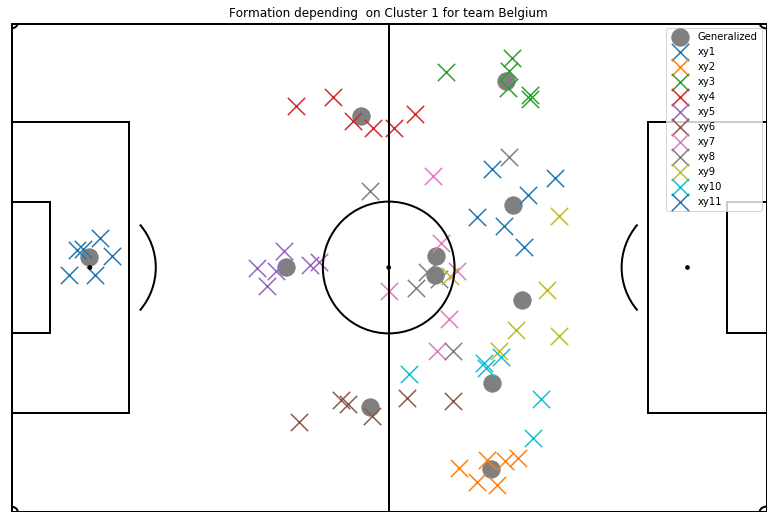

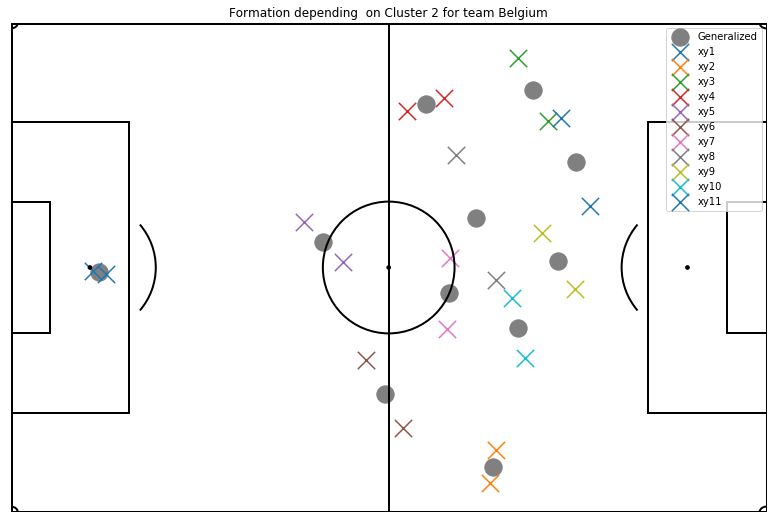

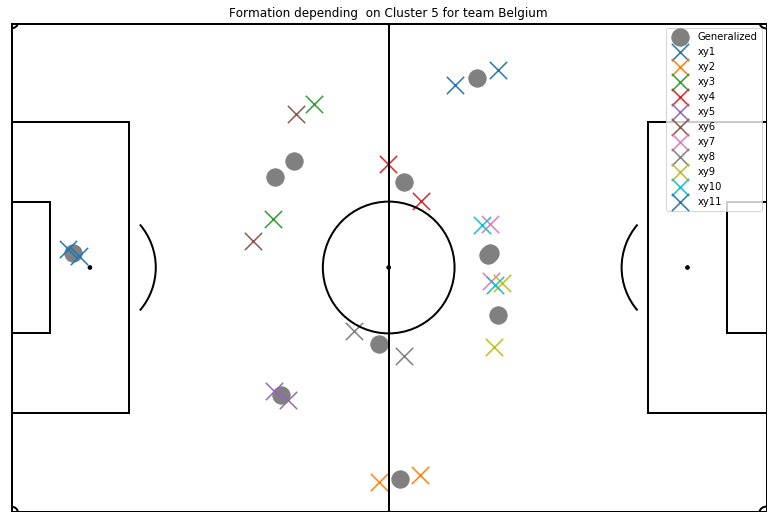

In [5]:
data = sorted(data1.loc[data1['team']=='Belgium']['cluster'].unique())
for i in data:
    f, ax = create_team_form(data1,'Belgium', int(i))

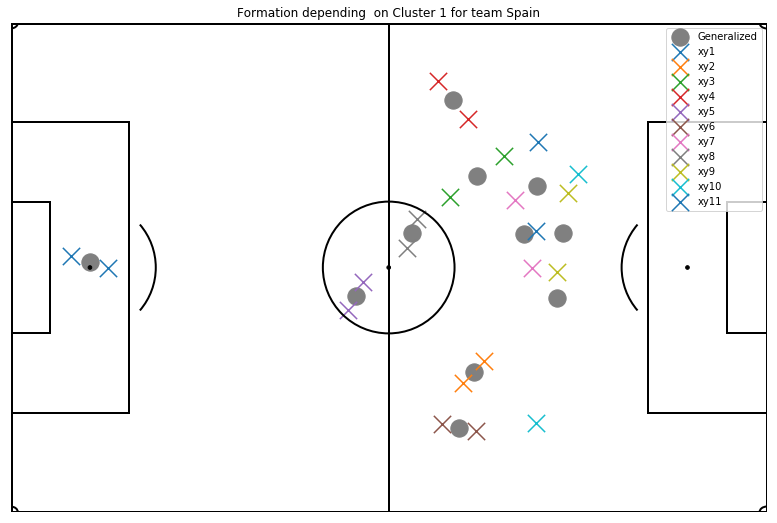

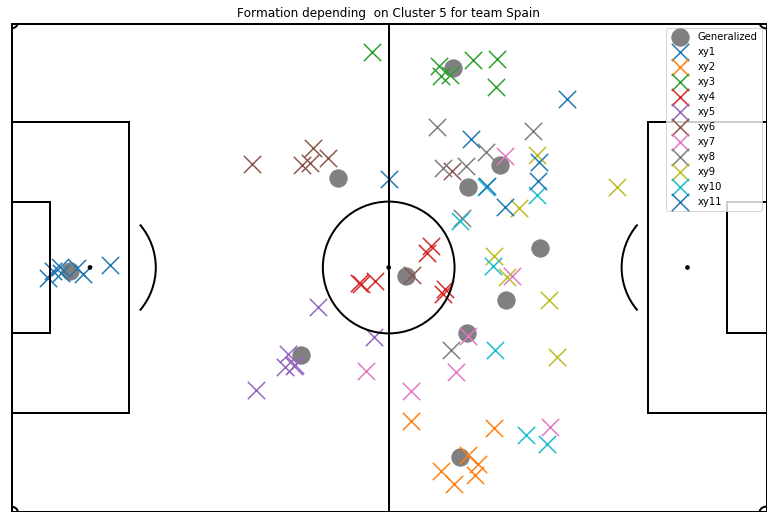

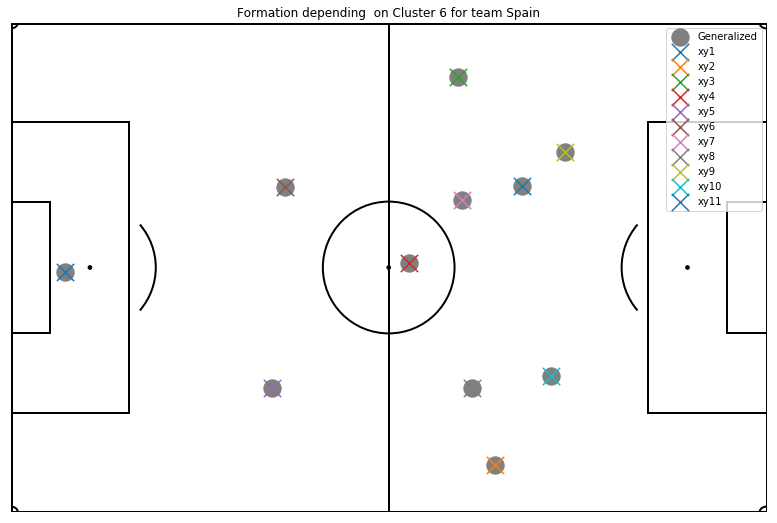

In [6]:
data = sorted(data1.loc[data1['team']=='Spain']['cluster'].unique())
for i in data:
    f, ax = create_team_form(data1,'Spain', int(i))

Below are presented differences between teams that belong to different clusters. During the world cup qualifiers the different playing styles were divided into 6 different clusters each one describing a distinctive playing style, but only 3 of them were observed during the final phase of the world cup. Below are presented the differences between the clusters that made it to the final stages and those which did not. In each side of the football pitch a different team is depicted, representing tha formation teams belonging in a particular cluster use. Comparing those formations we can possibly infer why some formations did not make it to the final stage. For example, one can easily realise that the formation of the teams belonging in cluster 1, leaves a lot of open/free space to the sides, and as a result wingers are probably abstracted from the players in the center, making the ball circulation harder.

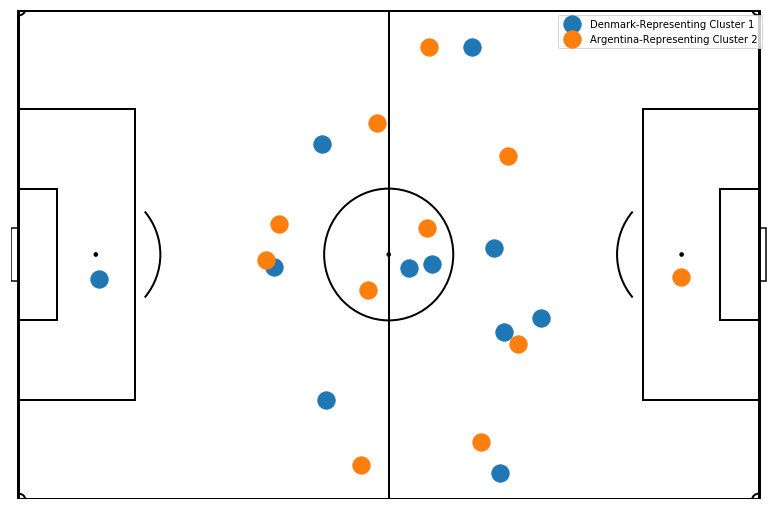

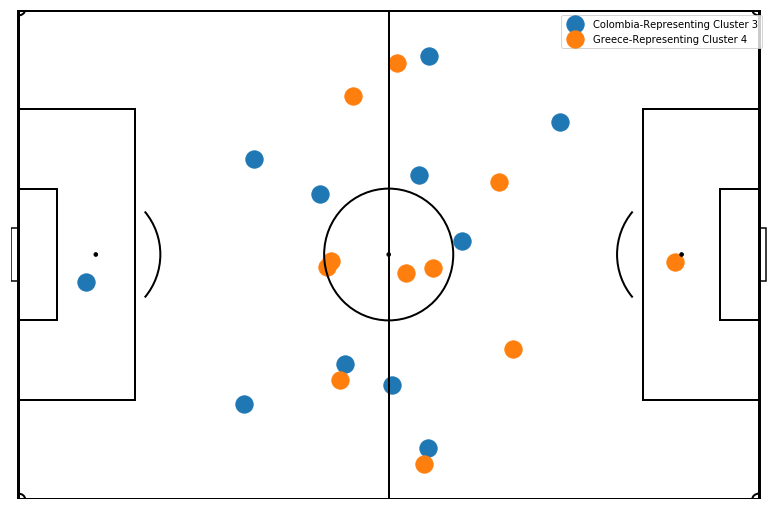

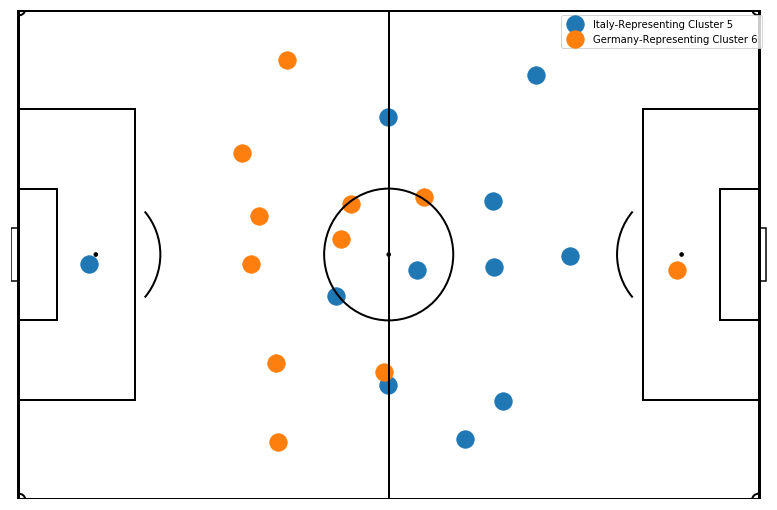

In [7]:
f, ax = pitch.create_normalized_pitch()
plt.scatter(clustered.loc['Denmark',1]['X1':'X11'], clustered.loc['Denmark',1]['Y1':'Y11'], s=300, \
        label=('Denmark-Representing Cluster 1'))
plt.scatter(50-(clustered.loc['Argentina',2]['X1':'X11']-50), clustered.loc['Argentina',2]['Y1':'Y11'], s=300, \
        label=('Argentina-Representing Cluster 2'))
plt.legend()

f, ax = pitch.create_normalized_pitch()
plt.scatter(clustered.loc['Colombia',4]['X1':'X11'], clustered.loc['Colombia',4]['Y1':'Y11'], s=300, \
        label=('Colombia-Representing Cluster 3'))
plt.scatter(50-(clustered.loc['Greece',6]['X1':'X11']-50), clustered.loc['Greece',6]['Y1':'Y11'], s=300, \
        label=('Greece-Representing Cluster 4'))
plt.legend()

f, ax = pitch.create_normalized_pitch()
plt.scatter(clustered.loc['Italy',3]['X1':'X11'], clustered.loc['Italy',3]['Y1':'Y11'], s=300, \
        label=("Italy-Representing Cluster 5"))
plt.scatter(50-(clustered.loc['Germany',5]['X1':'X11']-50), clustered.loc['Germany',5]['Y1':'Y11'], s=300, \
        label=('Germany-Representing Cluster 6'))
plt.legend()
plt.show()

In [8]:
def myPCA(start,stop=None,target=None,target_list=None):
    assert isinstance(start, str), "Must be string, check dataset for column names"
    assert (isinstance(stop, str) or (stop==None)), "Must be string or None, check dataset for column names"
    assert (isinstance(target, str)), "Must be string, check dataset for column names"
    assert (isinstance(target_list, list)), "Must be list, check dataset for targets in column target"
    
    x = original_data.loc[:,start:stop].values
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, original_data[[target]]], axis = 1)

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Dimenional Cluster Separation', fontsize = 20)

    for target_i in target_list:
        indicesToKeep = (finalDf[target] == target_i)
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 1']
               , s = 50)
    ax.legend(target_list, fontsize=30)
    return fig, ax


In order to identify which clusters differ more from each other I used PCA to lower the dimensions of my dataset to 2. Obtaining the figure below helped realizing that clusters 1-3 are more closely related than clusters 4-6. Still, even if it is not so clear, all clusters are separated. For example, cluster 5 and 6 even if they seem to be much more related  they are somewhat separated. One important task arises from such an observation; to identify which differences lead to this separation.

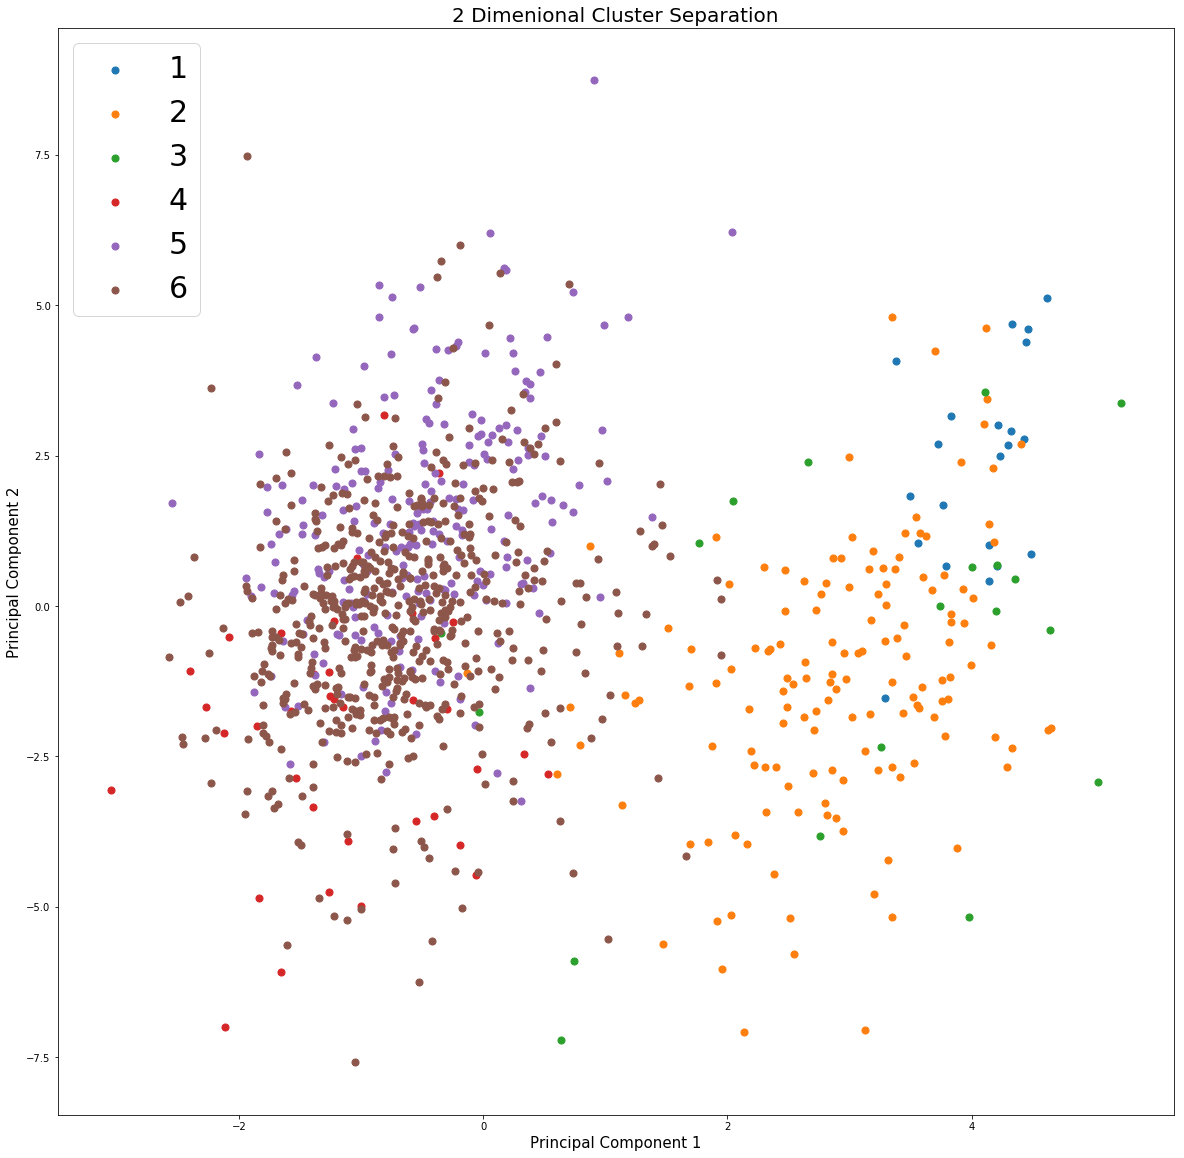

In [9]:
mytargets=[1,2,3,4,5,6]
f,ax = myPCA("X1",target="cluster", target_list=mytargets)

The bar plots below represent the position of each player in X-axis. The main differences are observed in players 2-6 between the first plot and the other two plots. Players in Cluster 1 are located further in the X-axis which means that the team has a much more offensive orientation. Clusters 2 and 3 are pretty similar as regards the position of the players in the X-axis, the only significant dissimilarityis the position of player 8. 

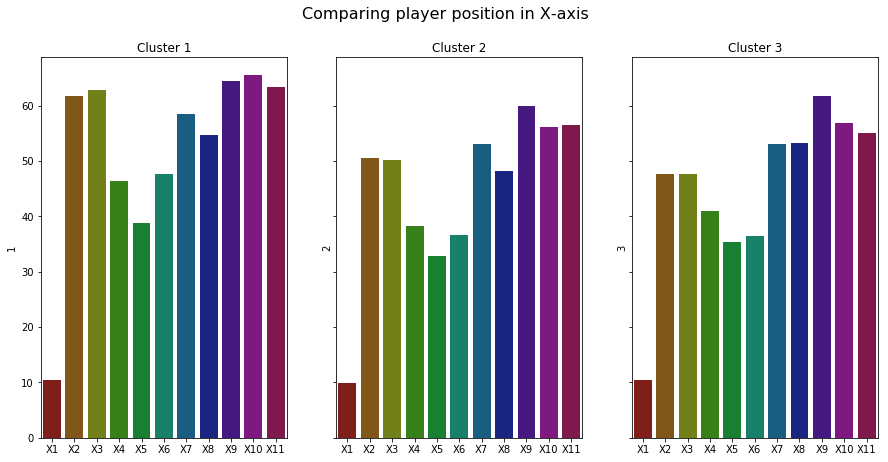

In [10]:
h =data1.groupby('cluster').mean()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
ax1.set_title("Cluster 1")
ax2.set_title("Cluster 2")
ax3.set_title("Cluster 3")
sns.barplot(x=h.columns[0:11] , y=h.loc[1,"X1":"X11"],ax=ax1, palette=sns.hls_palette(11, l=.3, s=.9))
sns.barplot(x=h.columns[0:11] , y=h.loc[2,"X1":"X11"], ax=ax2, palette=sns.hls_palette(11, l=.3, s=.9))
sns.barplot(x=h.columns[0:11] , y=h.loc[3,"X1":"X11"], ax=ax3, palette=sns.hls_palette(11, l=.3, s=.9))
fig.suptitle("Comparing player position in X-axis", fontsize=16)
plt.show()

###### We use the football pitch below to check the results obtained from the barplots above.  

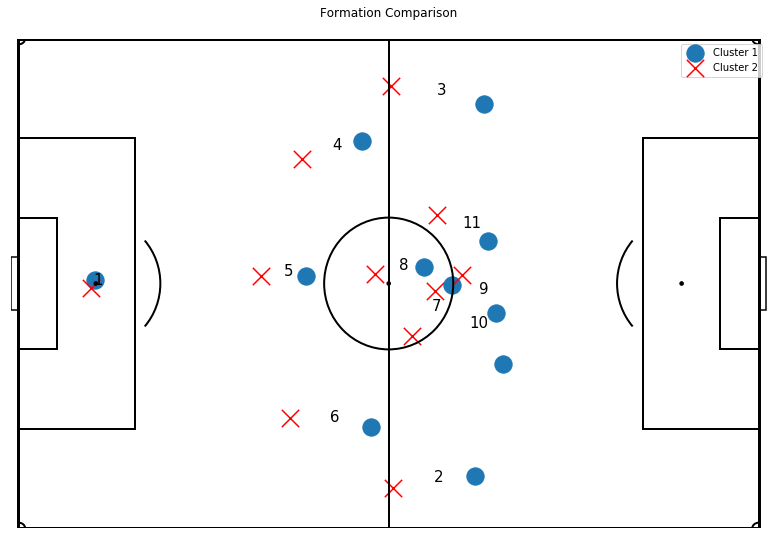

In [11]:
f, ax = pitch.create_normalized_pitch()
plt.scatter(h.loc[1]['X1':'X11'], h.loc[1]['Y1':'Y11'], s=300, \
        label=('Cluster 1'))
plt.scatter(h.loc[2]['X1':'X11'], h.loc[2]['Y1':'Y11'], s=300, \
        label=('Cluster 2'), color='r', marker ='x')
for i in range(1,12):
    x = (h.loc[1]['X%s' %(i)] +h.loc[2]['X%s' %(i)])/2.0
    y = (h.loc[2]['Y%s' %(i)] +  h.loc[1]['Y%s' %(i)])/2.0
    plt.annotate(i, (x,y),fontsize=15)
f.suptitle("Formation Comparison")
plt.legend()
plt.show()

The bar plots below represent the position of each player in Y-axis. The main differences are observed in players 2-6 between the last plot and the other two plots. Players in Cluster 3 are located closer to each other in the Y-axis which means that the team has a much more dense formation. Clusters 1 and 2 are pretty similar as regards the position of the players in the Y-axis, the only significant differences are in the position of players 9 and 10, who are located closer to the center leaving more open space on the sides (Cluster 2). 

In [12]:
h =data1.groupby('cluster').mean()
display(h)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11
cluster,,,,,,,,,,,,,,,,,,,,,
1,10.408415,61.705218,62.850906,46.330550,38.795896,47.592426,58.519084,54.767338,64.420733,65.468736,...,10.707809,86.621838,79.041237,51.530471,20.783279,49.601247,53.463146,44.032864,33.586483,58.631706
2,9.878340,50.614468,50.243446,38.324798,32.811915,36.634233,53.143296,48.143803,59.887245,56.196966,...,8.230015,90.425026,75.411424,51.596371,22.611856,39.179526,52.035004,51.671146,48.413574,64.085068
3,10.496773,47.723238,47.635128,40.927880,35.307574,36.459841,53.034334,53.196254,61.774918,56.845360,...,50.429474,53.363191,60.326729,51.272067,41.694889,33.899268,50.141312,50.526258,34.771566,80.459083
4,9.697982,44.740359,43.256755,43.366082,30.046702,29.600899,54.113322,46.060367,56.533098,53.531082,...,7.956886,91.959515,48.873716,29.860769,70.263451,25.706794,48.892331,53.327120,51.097257,71.627044
5,11.146407,53.477065,53.078228,49.744738,38.228858,38.147002,62.016447,52.027142,64.142123,61.033434,...,8.837987,90.809820,50.992438,30.106526,69.769843,32.310237,51.698755,50.716797,49.119547,70.691403
6,10.578662,49.542944,48.741087,47.012935,34.337380,34.183396,58.141076,49.783060,60.880813,58.197754,...,9.090887,90.546005,50.878635,30.650658,68.893542,28.853233,50.928291,51.154155,48.258828,72.906031


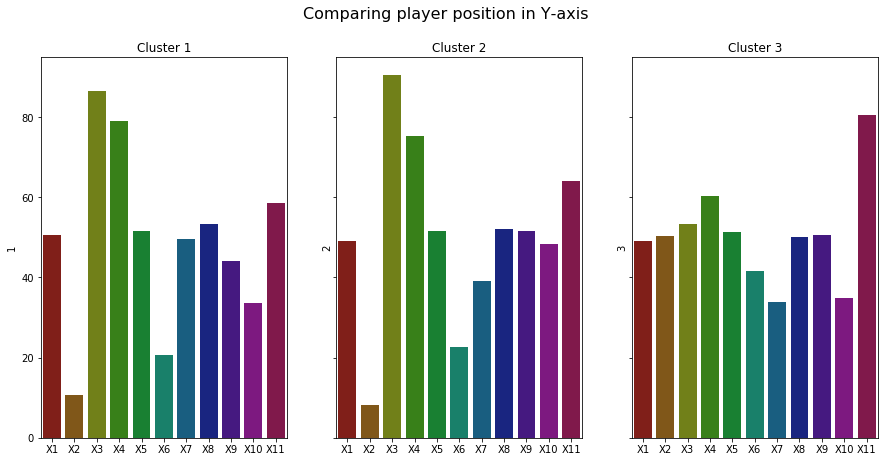

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
ax1.set_title("Cluster 1")
ax2.set_title("Cluster 2")
ax3.set_title("Cluster 3")
sns.barplot(x=h.columns[0:11] , y=h.loc[1,"Y1":"Y11"],ax=ax1, palette=sns.hls_palette(11, l=.3, s=.9))
sns.barplot(x=h.columns[0:11] , y=h.loc[2,"Y1":"Y11"], ax=ax2, palette=sns.hls_palette(11, l=.3, s=.9))
sns.barplot(x=h.columns[0:11] , y=h.loc[3,"Y1":"Y11"], ax=ax3, palette=sns.hls_palette(11, l=.3, s=.9))
fig.suptitle("Comparing player position in Y-axis", fontsize=16)
plt.show()

###### We use the football pitch below to check the results obtained from the barplots above.  

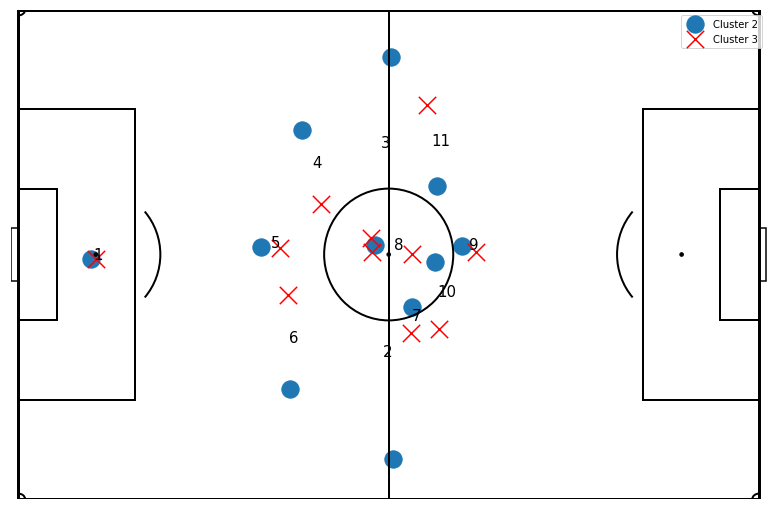

In [14]:
f, ax = pitch.create_normalized_pitch()
n = list(range(1,12))
plt.scatter(h.loc[2]['X1':'X11'], h.loc[2]['Y1':'Y11'], s=300, \
        label=('Cluster 2'))
for i in range(1,12):
    x = (h.loc[2]['X%s' %(i)] +h.loc[3]['X%s' %(i)])/2.0
    y = (h.loc[2]['Y%s' %(i)] +  h.loc[3]['Y%s' %(i)])/2.0
    plt.annotate(i, (x,y),fontsize=15)
plt.scatter(h.loc[3]['X1':'X11'], h.loc[3]['Y1':'Y11'], s=300, \
        label=('Cluster 3'), color='r', marker ='x')
plt.legend()

Comparing the clusters 4-6, makes obvious that the formation of the team in each cluster is pretty much the same. The main difference of those clusters is the offensive orientation of the team. It can be observed by comparing the position of the players in the X-axis, that teams in cluster 5 are more offensive than teams in cluster 6 which are more offensive than in teams in cluster 4.

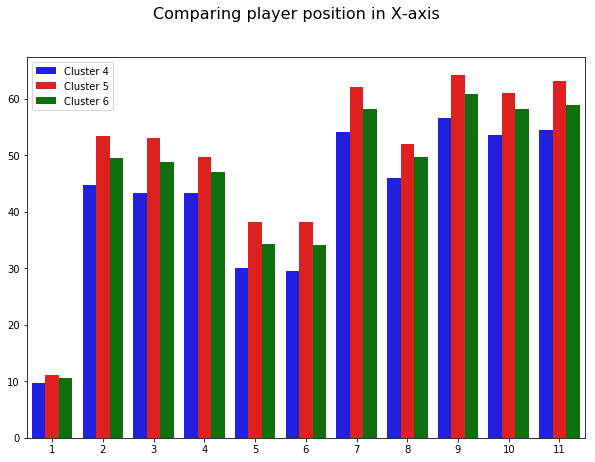

In [15]:
number_X = list(range(1,12)) + list(range(1,12)) +  list(range(1,12)) 
hueee = list(["Cluster 4"]*11) + list(['Cluster 5']*11) + list(['Cluster 6']*11) 
plt.figure(figsize=(10,7))
plt.suptitle("Comparing player position in X-axis",fontsize=16)
sns.barplot(x=number_X, y = pd.concat([h.loc[4]['X1':'X11'],h.loc[5]['X1':'X11'],h.loc[6]['X1':'X11']]), \
           hue = hueee, palette=['blue', 'red', 'green'])
plt.show()

The only dissimilarity that can be observed regarding the position of the players in the Y-axis is that 7th player in cluster 5 is more centrally located comparing to the other clusters, leaving more open space on the sides but possible improving the closeness of the team.

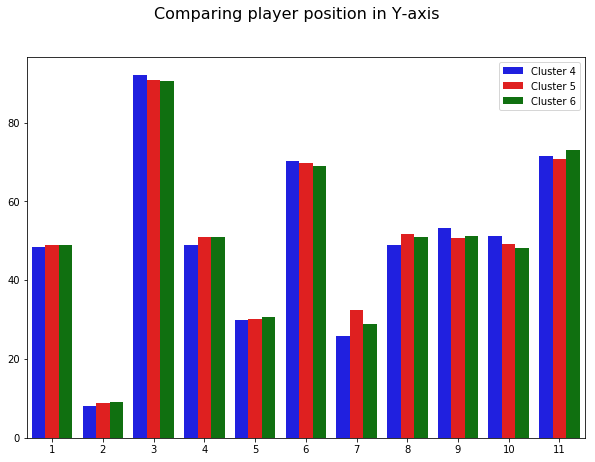

In [16]:
plt.figure(figsize=(10,7))
plt.suptitle("Comparing player position in Y-axis",fontsize=16)
sns.barplot(x=number_X, y = pd.concat([h.loc[4]['Y1':'Y11'],h.loc[5]['Y1':'Y11'],h.loc[6]['Y1':'Y11']]), \
           hue = hueee, palette=['blue', 'red', 'green'])
plt.show()

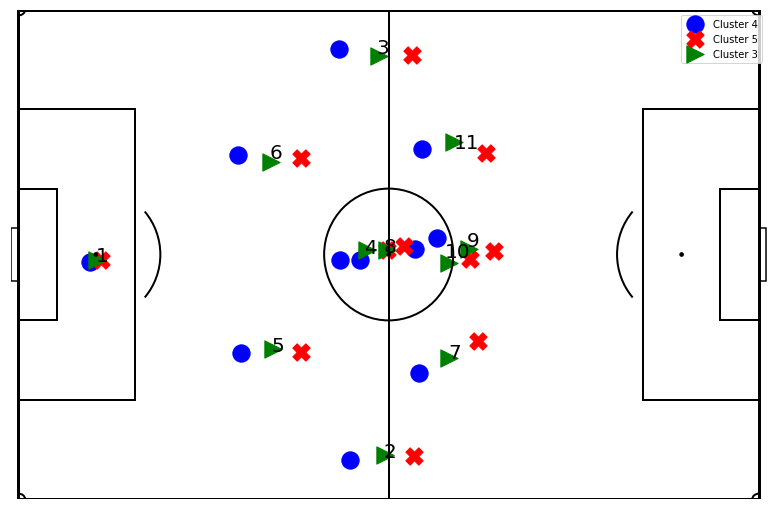

In [17]:
f, ax = pitch.create_normalized_pitch()
plt.scatter(h.loc[4]['X1':'X11'], h.loc[4]['Y1':'Y11'], s=300, \
        label=('Cluster 4'), color='b')
plt.scatter(h.loc[5]['X1':'X11'], h.loc[5]['Y1':'Y11'], s=300, \
        label=('Cluster 5'), color='r', marker ='X')
plt.scatter(h.loc[6]['X1':'X11'], h.loc[6]['Y1':'Y11'], s=300, \
        label=('Cluster 3'), color='g', marker ='>')
for i in range(1,12):
    x = (h.loc[4]['X%s' %(i)] +h.loc[5]['X%s' %(i)] + h.loc[6]['X%s' %(i)])/3.0
    y = (h.loc[4]['Y%s' %(i)] +  h.loc[5]['Y%s' %(i)]+h.loc[6]['Y%s' %(i)])/3.0
    plt.annotate(i, (x,y),fontsize=20)
plt.legend()
plt.show()

In this part of the analysis, we will check players as individuals and not as part of the team. Depending on the position of the player we will try to extract information about the features he assembles. 

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


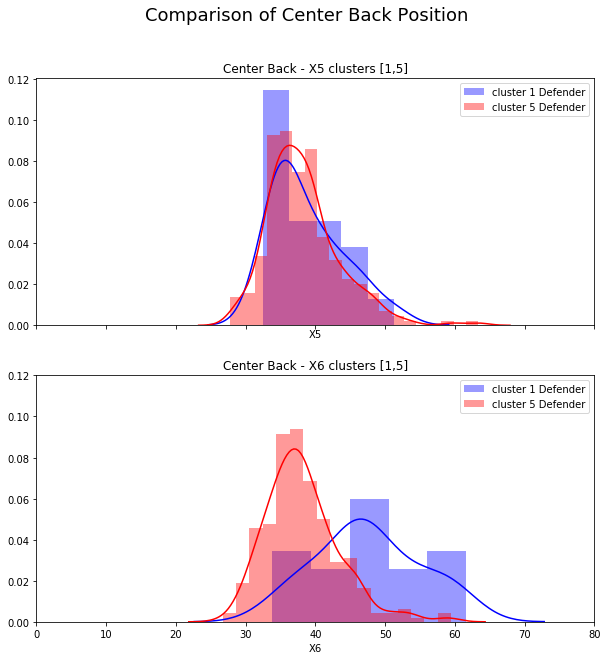

In [18]:
f, (ax1, ax2) = plt.subplots(2,figsize=(10,10), sharex=True, sharey=True)
data = data1.loc[data1['cluster']==1]
sns.distplot(data['X5'], color = 'b', label='cluster 1 Defender',ax=ax1)
data = data1.loc[data1['cluster']==5]
sns.distplot(data['X5'], color='r', label='cluster 5 Defender',ax=ax1)
data = data1.loc[data1['cluster']==1]
sns.distplot(data['X6'], color = 'b', label='cluster 1 Defender', ax=ax2)
data = data1.loc[data1['cluster']==5]
sns.distplot(data['X6'], color='r', label='cluster 5 Defender',ax=ax2)
plt.xlim(0,80)
f.suptitle("Comparison of Center Back Position", fontsize= 18)
ax1.set_title("Center Back - X5 clusters [1,5]")
ax2.set_title("Center Back - X6 clusters [1,5]")
ax2.legend()
ax1.legend()
plt.show()

The figures above represent how the positions of the center backs X5 and X6 are distributed in the X-axis. The main difference is observed when comparing defender X6. In cluster 1 the defender is located further in the X-axis which probably means that he has more responsibilities, as he is the link between defence and midfielders. 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versio

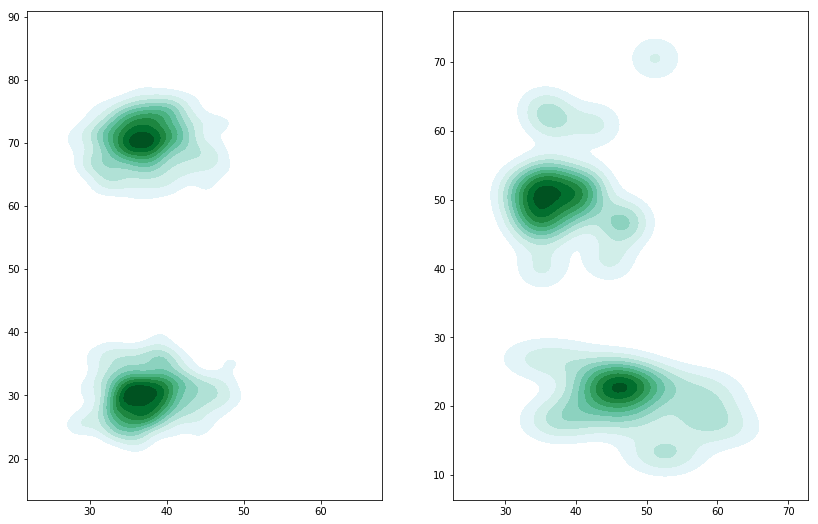

In [19]:
#Distribution of  the position of the players described above. It is easier to observe the differences described above
plt.figure(figsize=(14,9))
plt.subplot(1,2,1)
sns.kdeplot(data1.loc[data1['cluster']==5].loc[:,["X6","Y6"]], shade=True,shade_lowest=False)
sns.kdeplot(data1.loc[data1['cluster']==5].loc[:,["X5","Y5"]], shade=True,shade_lowest=False)
plt.subplot(1,2,2)
sns.kdeplot(data1.loc[data1['cluster']==1].loc[:,["X6","Y6"]], shade=True,shade_lowest=False)
sns.kdeplot(data1.loc[data1['cluster']==1].loc[:,["X5","Y5"]], shade=True,shade_lowest=False)
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been

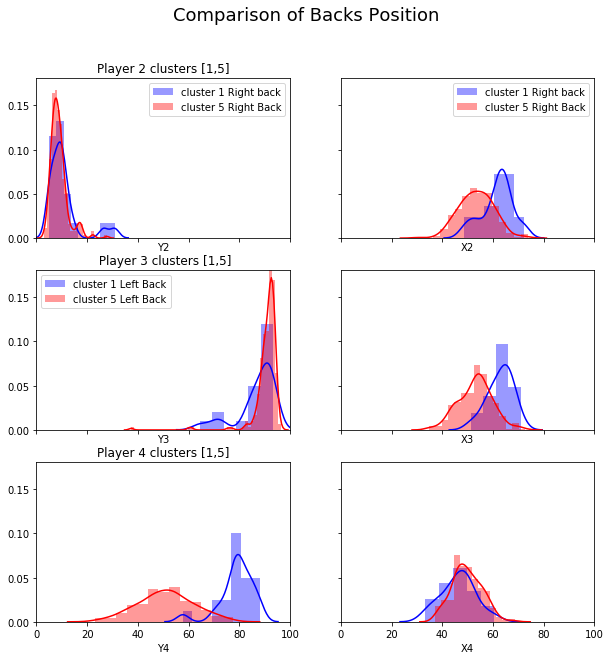

In [20]:
f, ((ax1, ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(10,10), sharex=True, sharey=True)
data = data1.loc[data1['cluster']==1]
sns.distplot(data['Y2'], color = 'b', label='cluster 1 Right back',ax=ax1)
data = data1.loc[data1['cluster']==5]
sns.distplot(data['Y2'], color='r', label='cluster 5 Right Back',ax=ax1)
data = data1.loc[data1['cluster']==1]
sns.distplot(data['Y3'], color = 'b', label='cluster 1 Left Back', ax=ax3)
data = data1.loc[data1['cluster']==5]
sns.distplot(data['Y3'], color='r', label='cluster 5 Left Back',ax=ax3)
data = data1.loc[data1['cluster']==1]
sns.distplot(data['Y4'], color = 'b', label='cluster 1 Player 4', ax=ax5)
data = data1.loc[data1['cluster']==5]
sns.distplot(data['Y4'], color='r', label='cluster 5 Player 4',ax=ax5)
data = data1.loc[data1['cluster']==1]
sns.distplot(data['X2'], color = 'b', label='cluster 1 Right back',ax=ax2)
data = data1.loc[data1['cluster']==5]
sns.distplot(data['X2'], color='r', label='cluster 5 Right Back',ax=ax2)
data = data1.loc[data1['cluster']==1]
sns.distplot(data['X3'], color = 'b', label='cluster 1 Left Back', ax=ax4)
data = data1.loc[data1['cluster']==5]
sns.distplot(data['X3'], color='r', label='cluster 5 Left Back',ax=ax4)
data = data1.loc[data1['cluster']==1]
sns.distplot(data['X4'], color = 'b', label='cluster 1 Player 4', ax=ax6)
data = data1.loc[data1['cluster']==5]
sns.distplot(data['X4'], color='r', label='cluster 5 Player 4',ax=ax6)
plt.xlim(0,100)
f.suptitle("Comparison of Backs Position", fontsize= 18)
ax1.set_title("Player 2 clusters [1,5]")
ax3.set_title(" Player 3 clusters [1,5]")
ax5.set_title("Player 4 clusters [1,5]")
ax2.legend()
ax1.legend()
ax3.legend()
plt.show()

Comparing the distributions above we can see that players 2 and 3 cover the right and left side of the team, respectively. Depending on the cluster, we observe that they are located further on the X axis and they are probably considered right and left winger, respectively (Cluster 1). One important observation is that the location on the Y-axis of player 4 changes a lot while it's position on the X axis remains almost the same. We can suspect that the role of the player changes completely when this player belongs to different clusters. For example, in cluster 1 player 4 can be considered as one of the center backs, as its position matches the position of center back X6 from the distribution described before and we can presume that the team uses a defensive formation of 3 center backs. On the other hand, player 4 in cluster 5 is considered the cental midfielder and player 2 and 3 have the role of right and left backs, respectively, while the team uses a defensive formation of 2 center back and 2 side backs. 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


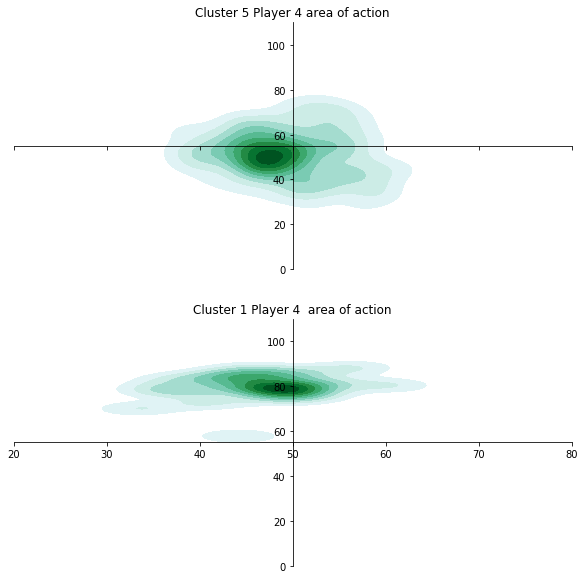

In [21]:
f, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1,figsize=(10,10), sharex=True, sharey=True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position('center')
ax1.spines['left'].set_position('center')
sns.kdeplot(data1.loc[data1['cluster']==5].loc[:,["X4","Y4"]], shade=True, ax=ax1,shade_lowest=False)
ax1.set_title("Cluster 5 Player 4 area of action")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('center')
ax2.spines['left'].set_position('center')
ax2.set_title("Cluster 1 Player 4  area of action")
sns.kdeplot(data1.loc[data1['cluster']==1].loc[:,["X4","Y4"]],shade=True, ax=ax2,shade_lowest=False)
plt.xlim(20,80)
plt.ylim(0,110)
plt.show()

Our hypothesis can be confirmed from the contour plots, as we can see that player 4 is located on the center of the football pitch.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


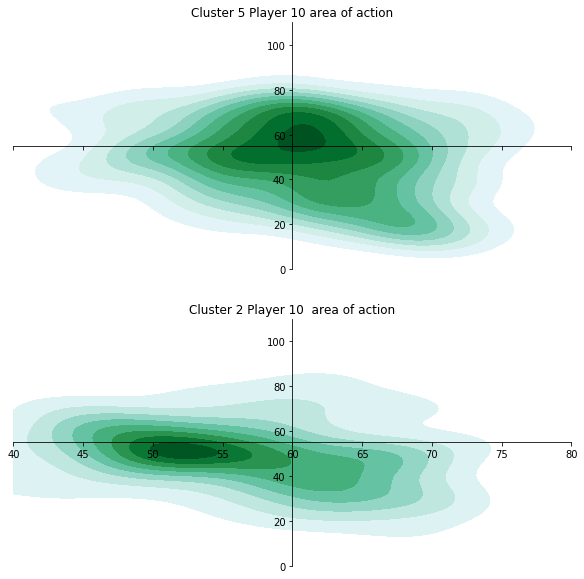

In [22]:
f, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1,figsize=(10,10), sharex=True, sharey=True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position('center')
ax1.spines['left'].set_position('center')
sns.kdeplot(data1.loc[data1['cluster']==5].loc[:,["X10","Y10"]], shade=True, ax=ax1,shade_lowest=False)
ax1.set_title("Cluster 5 Player 10 area of action")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('center')
ax2.spines['left'].set_position('center')
ax2.set_title("Cluster 2 Player 10  area of action")
sns.kdeplot(data1.loc[data1['cluster']==2].loc[:,["X10","Y10"]],shade=True, ax=ax2,shade_lowest=False)
plt.xlim(40,80)
plt.ylim(0,110)
plt.show()

The different role a player can have in different clusters can be also confirmed from the contour plots above. We are investigating the case of player 10 in clusters 5 and 2. We can observe that both have a broad area of action but we can assume that player 10 of cluster 5 has a more offensive role.  In general player 10, and more specifically that of cluster 5 is running more, covers more space and combines more offensive and defensive playing styles than the rest of the players. One assumption, or even recommendation, that can be made is that the manager of the team should select more players combing those features when building his team for the World Cup. The reason, for such an assumption is that this player has a very important role in organizing the game and should always be replaced immidiately when fatigue appears, as the player is responsible for the perfomance of the whole team.  

D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


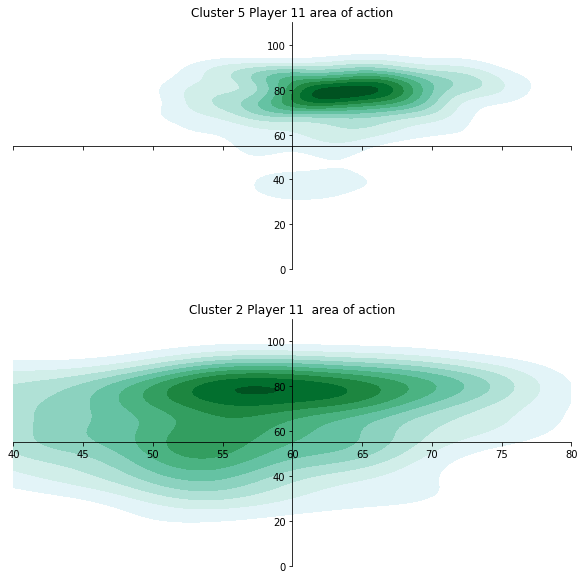

In [23]:
f, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1,figsize=(10,10), sharex=True, sharey=True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position('center')
ax1.spines['left'].set_position('center')
sns.kdeplot(data1.loc[data1['cluster']==5].loc[:,["X11","Y11"]], shade=True, ax=ax1,shade_lowest=False)
ax1.set_title("Cluster 5 Player 11 area of action")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('center')
ax2.spines['left'].set_position('center')
ax2.set_title("Cluster 2 Player 11  area of action")
sns.kdeplot(data1.loc[data1['cluster']==2].loc[:,["X11","Y11"]],shade=True, ax=ax2,shade_lowest=False)
plt.xlim(40,80)
plt.ylim(0,110)
plt.show()

It can be obvious from the figure above that player 11 in cluster 2 has more responsibilities and a wider area to cover in a match than player 11 in cluster 5. Comparing player 11 of cluster 2 with player 10 of cluster 5 we can assume that those two players share the same responsibilities in the team. Furthermore, player 11 of cluster 5 takes more part in organizing the offensive playing style of the team, while player 10 of cluster 2 has a much more important role in the defense. Considering all the above, it is confirmed once again that clusters 2 and 5 are completely different and they do not share a lot common features. 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


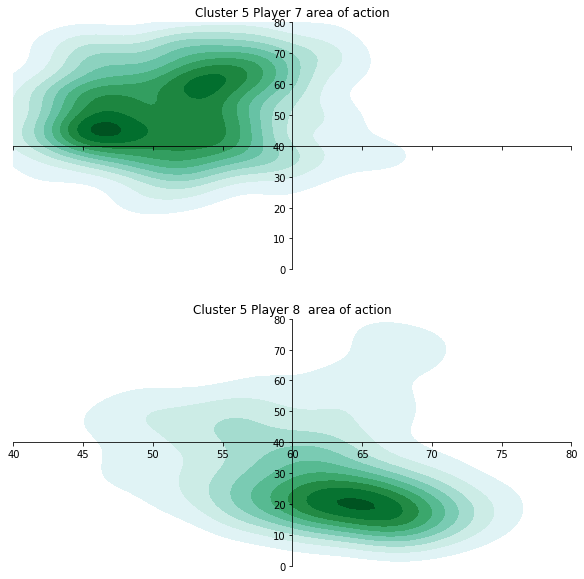

In [24]:
f, (ax1, ax2) = plt.subplots(2,figsize=(10,10), sharex=True, sharey=True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position('center')
ax1.spines['left'].set_position('center')
ax1.set_title("Cluster 5 Player 7 area of action")
sns.kdeplot(data1.loc[data1['cluster']==5].loc[:,["X7","Y7"]], shade=True, ax=ax2,shade_lowest=False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('center')
ax2.spines['left'].set_position('center')
ax2.set_title("Cluster 5 Player 8  area of action")
sns.kdeplot(data1.loc[data1['cluster']==5].loc[:,["X8","Y8"]],shade=True, ax=ax1,shade_lowest=False)
plt.xlim(40,80)
plt.ylim(0,80)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


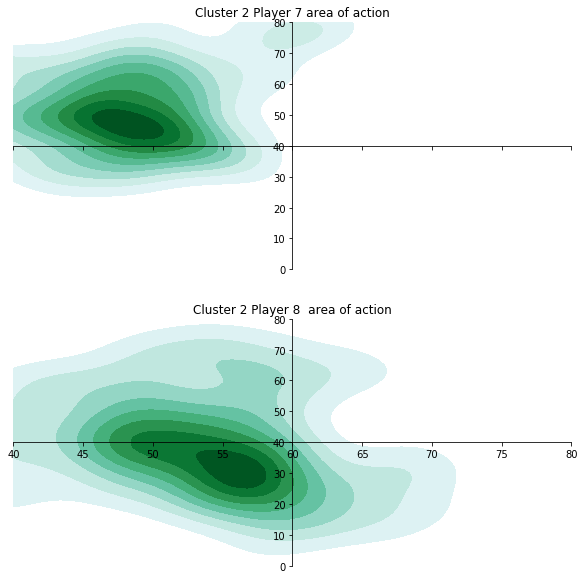

In [25]:
f, (ax1, ax2) = plt.subplots(2,figsize=(10,10), sharex=True, sharey=True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position('center')
ax1.spines['left'].set_position('center')
ax1.set_title("Cluster 2 Player 7 area of action")
sns.kdeplot(data1.loc[data1['cluster']==2].loc[:,["X7","Y7"]], shade=True, ax=ax2,shade_lowest=False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('center')
ax2.spines['left'].set_position('center')
ax2.set_title("Cluster 2 Player 8  area of action")
sns.kdeplot(data1.loc[data1['cluster']==2].loc[:,["X8","Y8"]],shade=True, ax=ax1,shade_lowest=False)
plt.xlim(40,80)
plt.ylim(0,80)
plt.show()

The contour plots of the 2 figures above compare players X7 and X8 (midfielders) and their position in the field for clusters 2 and 5. As it can be observed on the second figure (Cluster 2), the area of action of players X7 and X8 is highly overlapping, which might mean that those players share responsibilities as they both equally help distributing the game from defence to offence and also help the team defend when the opponent is attacking.

Players X7 and X8 in cluster 5, on the other hand, do not share area of action, which can lead to the reasonable deduction that those players have different roles in the team and as a result they need to possess dissimilar features. For example, player 8 could have better passing skills and player 7 could have better tackling skills, but they should both have great stamina skills.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


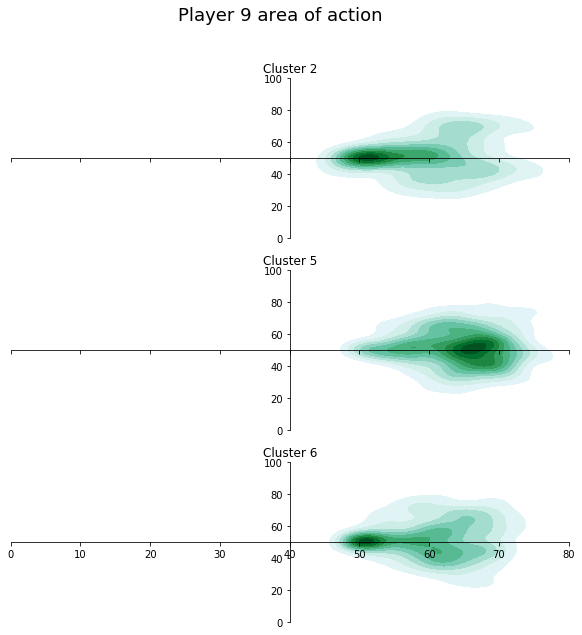

In [26]:
f, (ax1, ax2,ax3) = plt.subplots(3,figsize=(10,10), sharex=True, sharey=True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position('center')
ax1.spines['left'].set_position('center')
ax1.set_title("Cluster 2")
sns.kdeplot(data1.loc[data1['cluster']==2].loc[:,["X9","Y9"]], shade=True, ax=ax1,shade_lowest=False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('center')
ax2.spines['left'].set_position('center')
ax2.set_title("Cluster 5")
sns.kdeplot(data1.loc[data1['cluster']==5].loc[:,["X9","Y9"]],shade=True, ax=ax2 ,shade_lowest=False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_position('center')
ax3.spines['left'].set_position('center')
ax3.set_title("Cluster 6")
sns.kdeplot(data1.loc[data1['cluster']==6].loc[:,["X9","Y9"]],shade=True, ax=ax3,shade_lowest=False)
f.suptitle("Player 9 area of action", fontsize = 18)
plt.xlim(0,80)
plt.ylim(0,100)
plt.show()

The figure above compares the area of action of the same player (regarding it's role) for the clusters that made it to the final phase. Even if the players share the same area of action, it is obvious that the player's activity is centred on different location in the football pitch. Observing clusters 2 and 6 we see that the player's activity is centred more on the center of the field which possibly means that the player links defence and offence and acquire skills such as great passing and dribbling in order to help the distribution of the ball to his teammates. On the other hand, player 9 in cluster 5 has more offensive role so he needs to aqcuire a different set of skills to be useful to his team. For example, it would be more beneficial for the team to have a player in that position that has great shooting skills and can shoot with both feet.

### Reflection 

At first, we had to split our dataset in a way that each one of us could analyze a subset of the data and extract information on a different field/feature. My part is to investigate the spatial data of X1-Y11 and try to see how the data are distributed and find relations between the data. First of all, as the data refer to the position of the player in a football pitch, I  realised that I could acquire much more information if I could plot a football pitch which I can use to better visualize the position of the player and the formation of the team being studied in every case. As our data were already divided in clusters, it occured to me that its important to find the differences between the clusters and why those differences exist.

The first step, was to start plotting the formation that a team used depending on the cluster it was assigned in. Although, this was useful at first, the large amount of data we possess makes it difficult to create all those different plots and almost impossible to compare them. So, I used principal component analysis to reduce the dimensions of my dataset to only 2 dimensions, in an attempt to obtain more information on how the clusters are divided. As a result, the clusters could be further grouped into two categories which made the analysis easier. Now, it was obvious which clusters should be compared with each other to obtain fiducial and interesting results. For example, trying to compare the formation teams use in clusters 4-6 will give insignificant results, but comparing the defensive/offensive orientation of the team will produce much more interesting results.

The next step, was to investigate if the players in certain possitions have similar features. Of course, this is impossible by just comparing their location in the field. Nonetheless, we can use their mean position in the field and their area of action to extract information on the desired features a player should acquire in order to be of significant value for his team. For example, comparing tha area of action of two midfielders we realised that the two players need to have some similar features,such as stamina and dribbling, but they also need to specialize in different areas such as tackling and passing, depending on the role they have in the team.

Furthermore, analyzing the whole dataset and combining our results, we will be able to extract information of not only the formation of the team and the area of action of the players, but also of the different playing styles that each team used. More specifically, we will be able to investigate how a team performed comparing it with the teams in a cluster and find out if there were any weaknesses or a main strength that made the team stand out. It might be also possible to make suggestions on the features a team must add to its playing style to improve its perfomance.

Moreover, as many teams tend to be consistent in the way they play, we could use this information and our analysis to make suggestions on which players a manager should call up in order to improve the perfomance of a team. For example, as Spain can be mostly assigned to cluster 5, from the graphs above was made obvious that player 9 has mostly an offensive role. Selecting players that combine offensive skills such as shooting and trapping, with passing and dribbling (skills which are mostly found in midfielders) can really improve the performance of the team. This player will be able to not only help offensively, but also assist the midfielders in organizing the game and relief some pressure.

Finally, using principal component analysis using all of our data (all the 44 columns C1-Y11) we can obtain the figure below. It can be observed that the clusters are further separeted. So, if we add the features of closeness and betweenness in the analysis described above, we can extract much more interesting information about the clusters. Obtaining more data can seperate the clusters even more and make our suggestions even better. For example,if we get more data describing the outcome of the game, or which team was playing against the studied team when the data were obtained, we might be able to implement a system that predicts the outcome of the game or making suggestions on how a team mostly assigned to cluster A can confront a team assigned to cluster B to improve its chances of winning. 

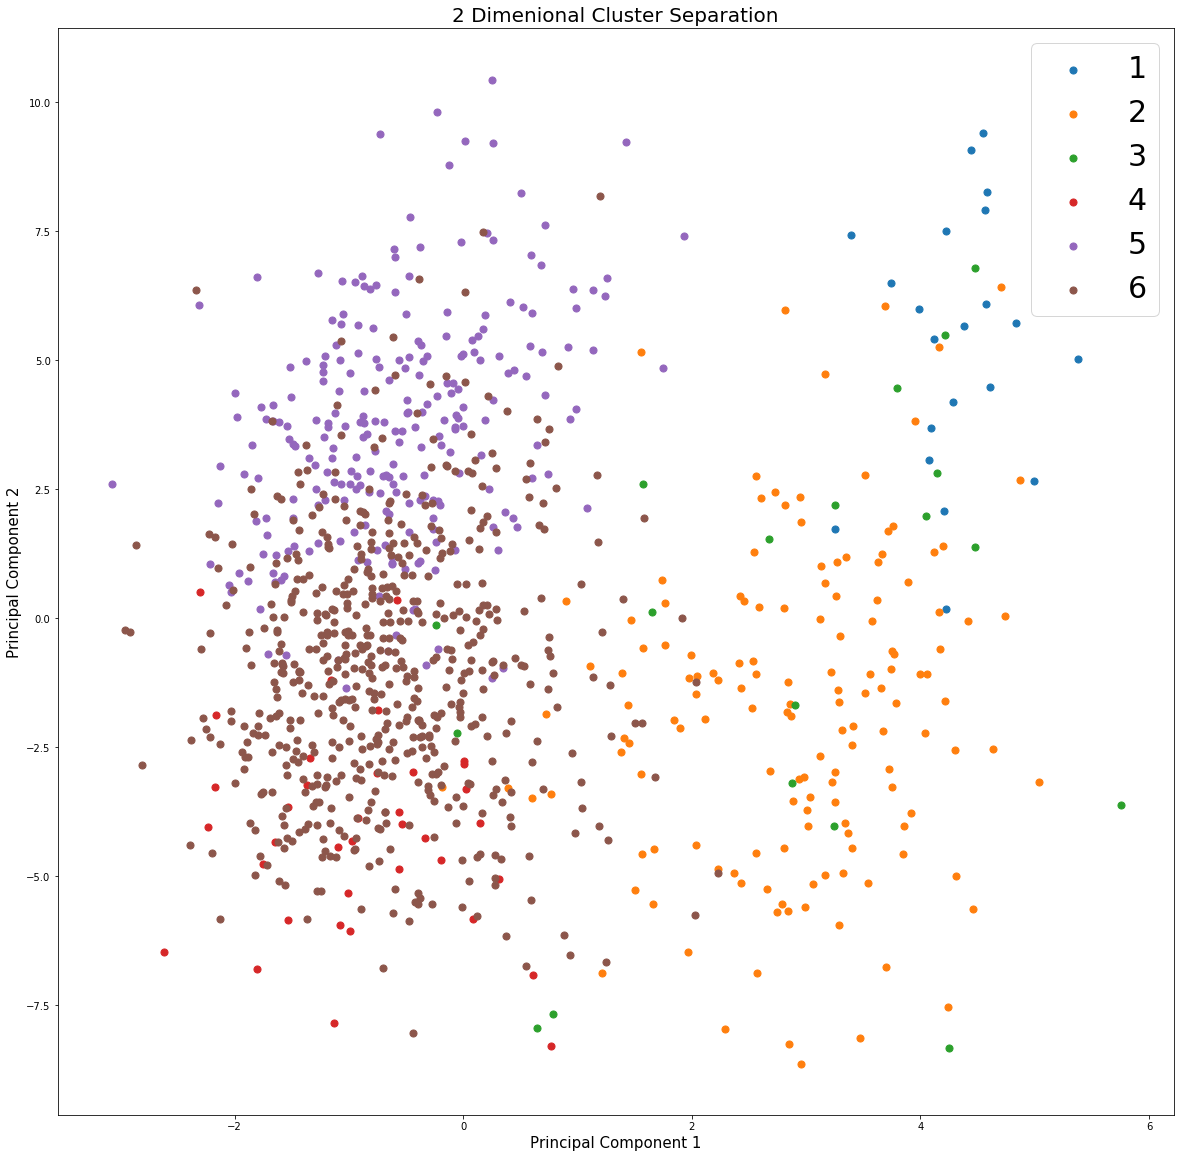

In [27]:
f, ax = myPCA("C1", target="cluster", target_list=mytargets)

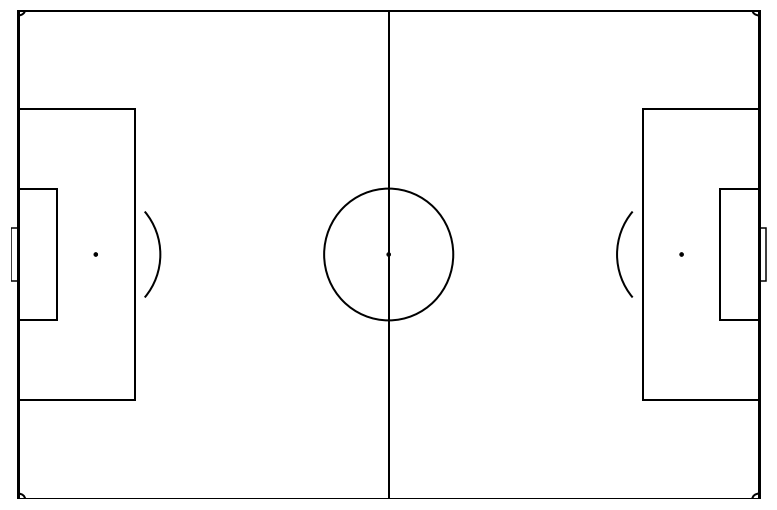

In [4]:
f, ax = pitch.create_normalized_pitch()
f.savefig('gipedo')